In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os


In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset_ML'


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
categories = ['0. Cut Shot', '1. Cover Drive', '2. Straight Drive', '3. Pull Shot', '4. Leg Glance Shot', '5. Scoop Shot']
img_size = 64

In [ ]:
data = []
labels = []


In [ ]:
for category in categories:
    path = os.path.join(dataset_path, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(class_num)
        except Exception as e:
            print(f"Error reading {img_name}: {e}")


In [ ]:
data = np.array(data)
labels = np.array(labels)


In [ ]:

data = data / 255.0

data = np.expand_dims(data, axis=-1)

labels = to_categorical(labels, num_classes=len(categories))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# Output layer (6 categories - one for each shot type)
model.add(Dense(len(categories), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.2437 - loss: 1.7780 - val_accuracy: 0.4760 - val_loss: 1.3953
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.4938 - loss: 1.3359 - val_accuracy: 0.6365 - val_loss: 1.0903
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.6351 - loss: 1.0373 - val_accuracy: 0.6680 - val_loss: 0.9533
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.6937 - loss: 0.8754 - val_accuracy: 0.7119 - val_loss: 0.7787
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.7407 - loss: 0.6858 - val_accuracy: 0.7531 - val_loss: 0.7309


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


23/23 - 1s - 65ms/step - accuracy: 0.7531 - loss: 0.7309
Test accuracy: 0.7530864477157593


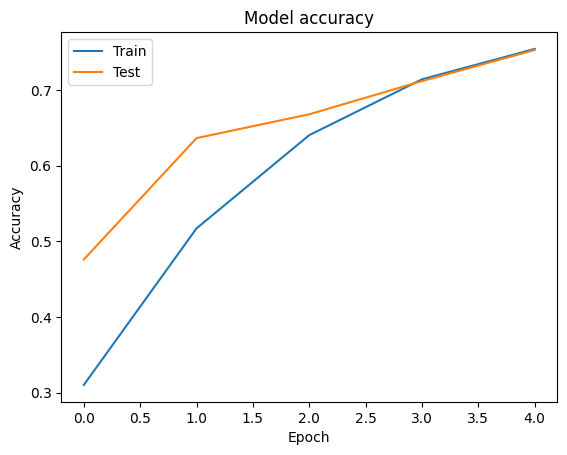

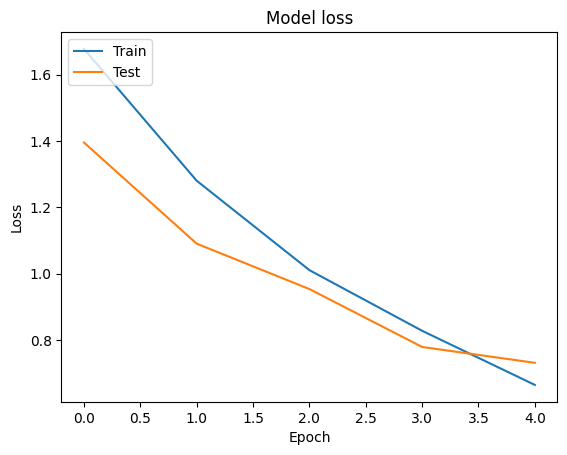

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
